<a href="https://colab.research.google.com/github/keithtyq/Spam-Email-Detection/blob/main/CSCI218_Group_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CSCI218 Group Project
#
# Topic: Spam Email Detection
# Link: https://link.springer.com/article/10.1007/s10462-022-10195-4

# Example Spam email dataset
# https://www.kaggle.com/datasets/nitishabharathi/email-spam-dataset

In [ ]:
# Upload file from device
# Remember to download dataset first
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Specify the path to your zip file
zip_file_path = '/content/archive.zip'

# Extract the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Load the SpamAssassin dataset
df = pd.read_csv('/content/completeSpamAssassin.csv', encoding='latin-1')

In [ ]:
# Handle missing or non-string values by replacing NaNs with empty strings and ensuring all values are strings
df['Body'] = df['Body'].fillna('').astype(str)

# Now calculate the length of each email
df['email_length'] = df['Body'].apply(len)

# Verify that the email length column has been created correctly
df[['Body', 'email_length']].head()


,Body,email_length
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1111
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,753
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,610
3,##############################################...,2863
4,I thought you might like these:\n1) Slim Down ...,641


# Data Preprocessing: Feature Extraction, Train-Validation-Test Split, and TF-IDF Vectorization

In [ ]:
# Extract features (email text) and labels (spam/ham)
X = df['Body']  # Features (email text)
y = df['Label']  # Labels (1 = spam, 0 = ham)

# Split the dataset into 60% training and 40% (validation + test) set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the 40% temporary set into 50% validation and 50% test (20% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # You can tune max_features as needed

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the validation and test data
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Verify the shape of the resulting matrices
print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Validation data shape: {X_val_tfidf.shape}")
print(f"Test data shape: {X_test_tfidf.shape}")


Training data shape: (3627, 5000)
Validation data shape: (1209, 5000)
Test data shape: (1210, 5000)


# Data Visualisation

In [ ]:
# Check the first few rows of the dataset
df.head()


,Unnamed: 0,Body,Label,email_length
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610
3,3,##############################################...,1,2863
4,4,I thought you might like these:\n1) Slim Down ...,1,641


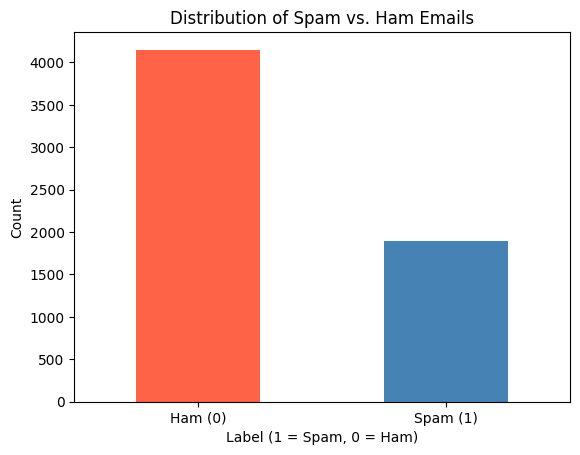

In [ ]:
# Count the distribution of spam (1) and ham (0) emails
df['Label'].value_counts().plot(kind='bar', color=['#FF6347', '#4682B4'])

# Add labels and title
plt.title('Distribution of Spam vs. Ham Emails')
plt.xlabel('Label (1 = Spam, 0 = Ham)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham (0)', 'Spam (1)'], rotation=0)
plt.show()

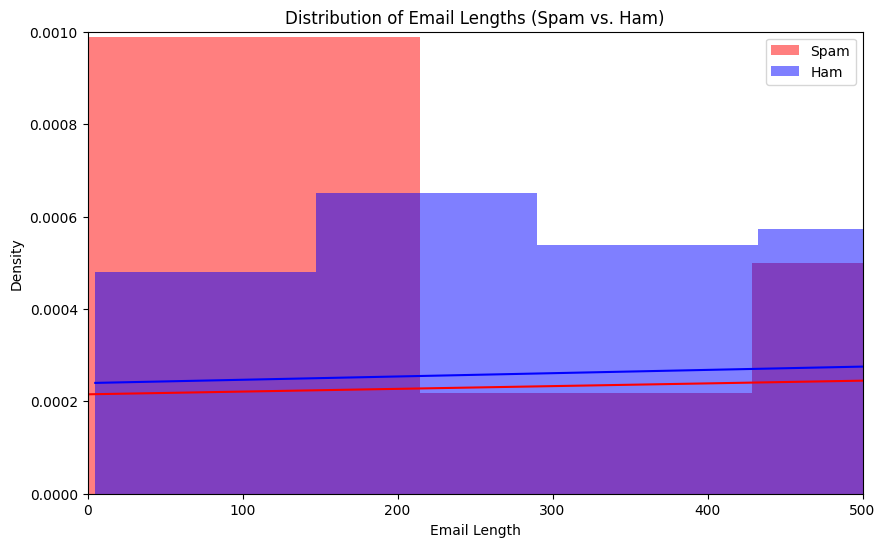

In [ ]:
# Visualize the distribution of email lengths for spam (1) vs. ham (0)
plt.figure(figsize=(10, 6))

sns.histplot(df[df['Label'] == 1]['email_length'], color='red', kde=True, label='Spam', stat='density', linewidth=0)
sns.histplot(df[df['Label'] == 0]['email_length'], color='blue', kde=True, label='Ham', stat='density', linewidth=0)

# Add labels and title
plt.legend()
plt.title('Distribution of Email Lengths (Spam vs. Ham)')
plt.xlabel('Email Length')
plt.ylabel('Density')

# Adjust x-axis and y-axis limits to zoom in
plt.xlim(0, 500)  # Adjust this value based on the range of email lengths
plt.ylim(0, 0.001)  # Adjust the y-limit to focus on the density curve

plt.show()
